In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df = pd.read_csv('../Datasets/vgsales1.csv', parse_dates=['Year'])
df["Year"].fillna(df["Year"].median(),inplace = True)
df["Year"] = df['Year'].dt.year

na_df = df.groupby('Year')[['Global_Sales']].sum()
# na_df

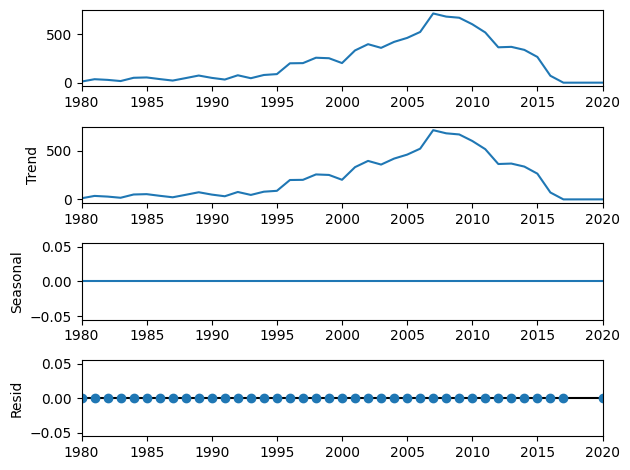

In [189]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = na_df

result = seasonal_decompose(series, model='additive', period=1)

result.plot()
pyplot.show()

Test RMSE: 501.780


c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, 'Year')

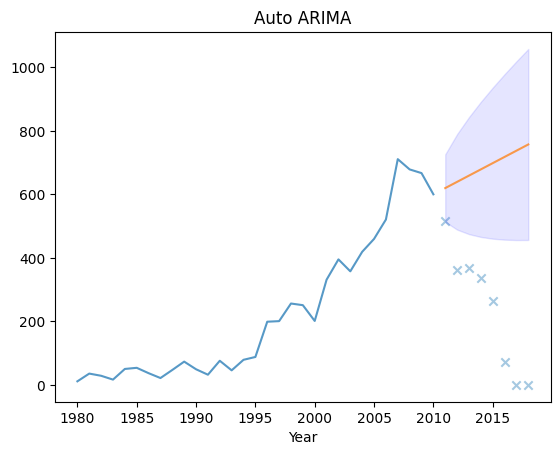

In [190]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import numpy as np


# print(na_df)
# na_df.Year = na_df.set_index("Year")
train, test = model_selection.train_test_split(na_df, train_size=31)


modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=False,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

# print(modl.summary())
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1980  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Auto ARIMA")
plt.xlabel("Year")



c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


31    613.141946
32    498.170552
33    429.729307
34    373.281909
35    224.401320
36    254.865474
37    214.508021
38    204.883699
Name: predicted_mean, dtype: float64


c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, 'Year')

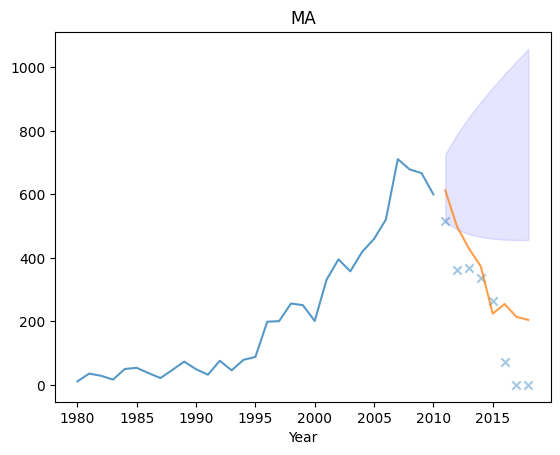

In [191]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
model = ARIMA(train, order=(0,0,10))
model_fitted  = model.fit()
predictions = model_fitted.forecast(len(test))
print(predictions)
# model_fitted.plot
# modelfit.plot_predict(dynamic = False) 

x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1980  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
# plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75) # forecast lynx
plt.plot(x_years[x_axis[train.shape[0]:]], predictions, alpha=0.75)  # Forecast arima
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("MA")
plt.xlabel("Year")
# predictions.plot()

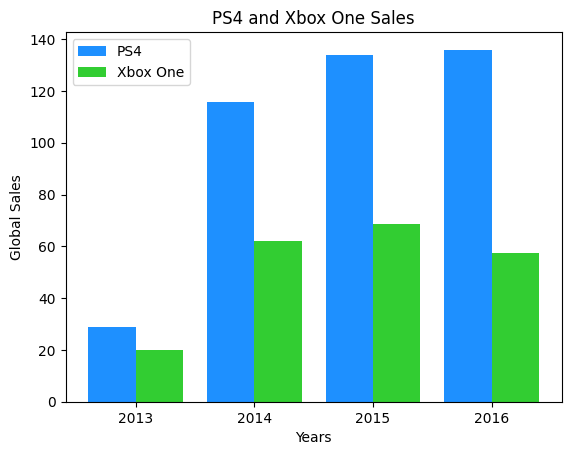

In [192]:
df = pd.read_csv('../Datasets/PS4_GamesSales.csv', parse_dates=['Year'], encoding='latin1')
df["Year"].fillna(df["Year"].median(),inplace = True)
df["Year"] = df['Year'].dt.year
df = df[df.Year < 2017]
ps_df = df.groupby('Year')[['Global']].sum()

df = pd.read_csv('../Datasets/XboxOne_GameSales.csv', parse_dates=['Year'], encoding='latin1')
df["Year"].fillna(df["Year"].median(),inplace = True)
df["Year"] = df['Year'].dt.year
df = df[df.Year < 2017]

xb_df = df.groupby('Year')[['Global']].sum()

plt.bar(ps_df.index - 0.2, ps_df.Global, 0.4, label="PS4",color="dodgerblue")
plt.bar(xb_df.index + 0.2, xb_df.Global, 0.4, label="Xbox One",color="limegreen")


plt.xticks(ps_df.index, ps_df.index)
plt.xlabel("Years")
plt.ylabel("Global Sales")
plt.title("PS4 and Xbox One Sales")
plt.legend()

plt.show()

(37, 1)


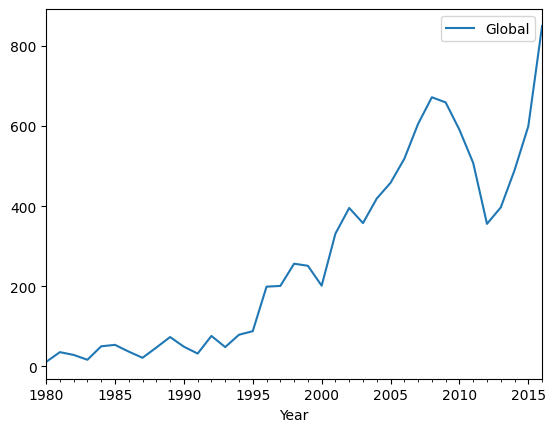

In [193]:
my_df = pd.read_csv('../Datasets/vgsales.csv', parse_dates=['Year'], encoding='latin1')
my_df2 = pd.read_csv('../Datasets/PS4_GamesSales.csv', parse_dates=['Year'], encoding='latin1')
my_df3 = pd.read_csv('../Datasets/XboxOne_GameSales.csv', parse_dates=['Year'], encoding='latin1')

trimmed_df = my_df[['Year', 'Global_Sales']] 
trimmed_df = trimmed_df.rename(columns= {'Global_Sales':'Global'})
trimmed_df2 = my_df2[['Year', 'Global']] 
trimmed_df3 = my_df3[['Year', 'Global']] 

merged_data = trimmed_df.merge(trimmed_df2, how='outer').merge(trimmed_df3, how='outer')
merged_data.dropna(inplace=True)

df_final = merged_data.groupby(merged_data.Year).sum('Global')

df_final = df_final[df_final.index < '2017-01-01']
df_final.plot()
print(df_final.shape)




# xbox_df = pd.read_csv("../Datasets/XboxOne_GameSales.csv",parse_dates=['Year'],encoding="latin1")
# x_df = xbox_df.groupby(['Genre','Year']).agg('sum',['Global']).reset_index()
# ps_df = pd.read_csv("../Datasets/PS4_GamesSales.csv",parse_dates=['Year'],encoding="latin1")
# ps_df = ps_df.groupby(['Genre','Year']).agg('sum',['Global']).reset_index()


# filtered_x = x_df.loc[(x_df["Year"]=="2018-01-01")]
# filtered_x


# filtered_ps = ps_df.loc[(ps_df["Year"]=="2018-01-01")]
# filtered_ps

# print(filtered_x)

# plt.pie(filtered_x["Global"],labels=filtered_x["Genre"])
# plt.title("Xbox Genre")
# plt.show()


# plt.pie(filtered_ps["Global"],labels=filtered_ps["Genre"])
# plt.title("PS4 Genre")
# plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -200.875
Date:                Tue, 15 Nov 2022   AIC                            407.750
Time:                        10:05:49   BIC                            412.501
Sample:                    01-01-1980   HQIC                           409.408
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.9598     11.746      1.359      0.174      -7.063      38.982
ar.L1          0.4216      0.156      2.702      0.007       0.116       0.727
sigma2      4090.1645   1058.943      3.862      0.0

Text(0.5, 0, 'Year')

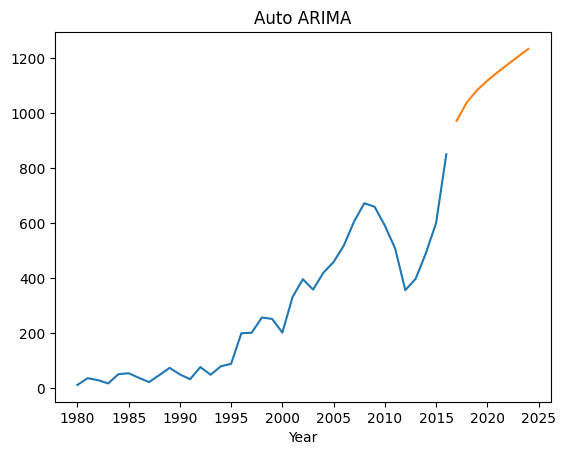

In [194]:
df_final.reset_index(inplace=True)
df_final.set_index("Year", inplace=True)
modl = pm.auto_arima(df_final, seasonal=False)

print(modl.summary())
preds= modl.predict(n_periods=test.shape[0])
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1980  # Year starts at 1821

plt.plot(df_final)
plt.plot(preds)
plt.title("Auto ARIMA")
plt.xlabel("Year")

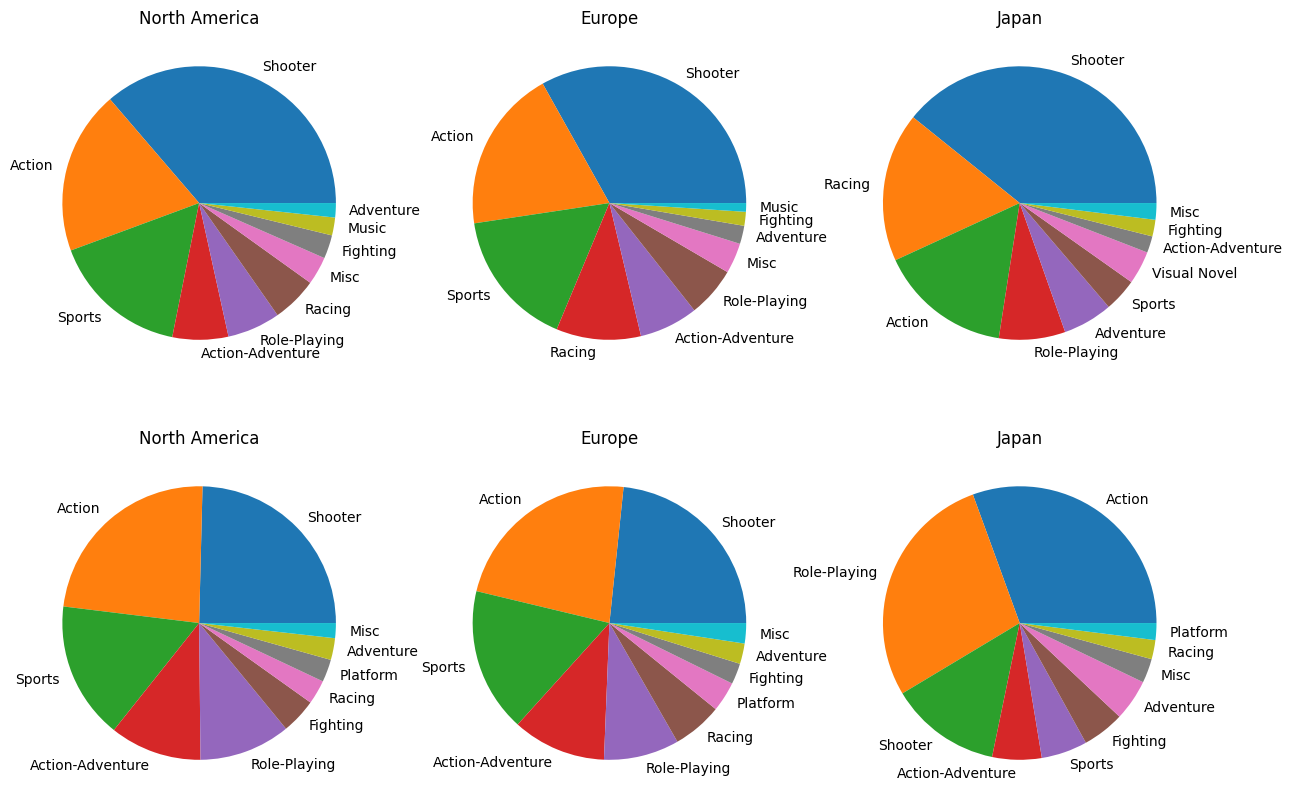

In [195]:
x_df = pd.read_csv("../Datasets/XboxOne_GameSales.csv",parse_dates=['Year'],encoding="latin1")
x_df_na = x_df.groupby(['Genre']).sum('North America').sort_values('North America', ascending=False)[:10]
x_df_eu = x_df.groupby(['Genre']).sum('Europe').sort_values('Europe', ascending=False)[:10]
x_df_jp = x_df.groupby(['Genre']).sum('Japan').sort_values('Japan', ascending=False)[:10]

ps_df = pd.read_csv("../Datasets/PS4_GamesSales.csv",parse_dates=['Year'],encoding="latin1")
ps_df_na = ps_df.groupby(['Genre']).sum('North America').sort_values('North America', ascending=False)[:10]
ps_df_eu = ps_df.groupby(['Genre']).sum('Europe').sort_values('Europe', ascending=False)[:10]
ps_df_jp = ps_df.groupby(['Genre']).sum('Japan').sort_values('Japan', ascending=False)[:10]




figure, axis = plt.subplots(2, 3)

axis[0,0].pie(x_df_na['North America'],labels=x_df_na.index)

axis[0,0].title.set_text("North America")
axis[0,1].pie(x_df_eu['Europe'],labels=x_df_eu.index)
axis[0,1].title.set_text("Europe")
axis[0,2].pie(x_df_jp['Japan'],labels=x_df_jp.index)
axis[0,2].title.set_text("Japan")
axis[1,0].pie(ps_df_na['North America'],labels=ps_df_na.index)
axis[1,0].title.set_text("North America")
axis[1,1].pie(ps_df_eu['Europe'],labels=ps_df_eu.index)
axis[1,1].title.set_text("Europe")
axis[1,2].pie(ps_df_jp['Japan'],labels=ps_df_jp.index)
axis[1,2].title.set_text("Japan")


figure.set_figheight(10)
figure.set_figwidth(15)

plt.show()

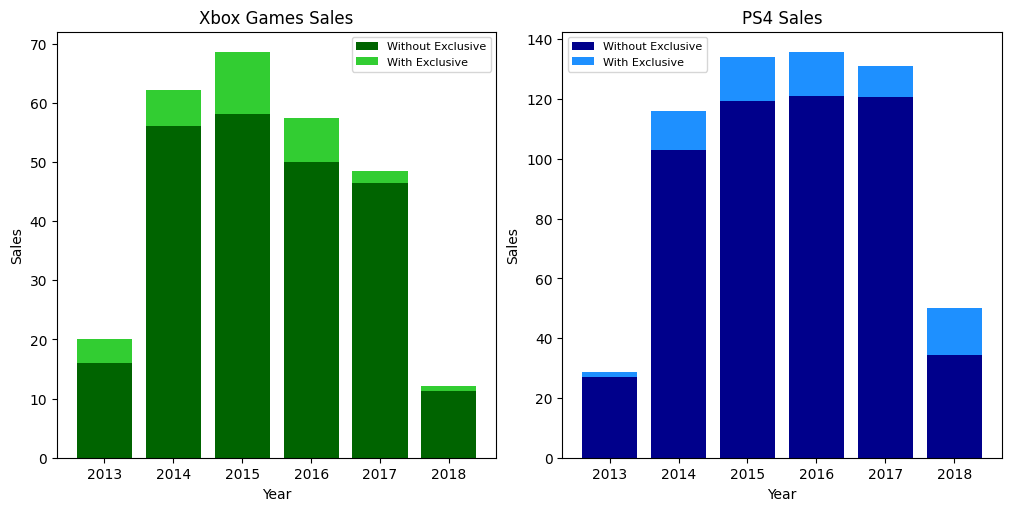

In [196]:
xb_df = pd.read_csv("../Datasets/XboxOne_GameSales.csv",parse_dates=['Year'],encoding="latin1")
xb_df["Year"] = xb_df['Year'].dt.year
xb_df = xb_df[xb_df.Year < 2019]
xb_ex = ['Halo', 'Sea of Thieves', 'Forza', 'Sunset Overdrive', 'Dead Rising 3', 'Gears of War']

ps_df = pd.read_csv("../Datasets/PS4_GamesSales.csv",parse_dates=['Year'],encoding="latin1")
ps_df["Year"] = ps_df['Year'].dt.year
ps_df = ps_df[ps_df.Year < 2019]
ps_ex = ['Uncharted', 'Spider', 'God of', 'Bloodborne', 'Knack', 'Infamous', 'inFAMOUS', 'DriveClub', 'The Last of Us', 'MLB', 'Until Dawn', 'Gravity Rush', 'Tearaway', 'The Order', 'Ratchet', 'Horizon']


xb_df_sp = xb_df[xb_df['Game'].str.startswith(tuple(xb_ex))]
xb_df_wo = xb_df[~xb_df['Game'].str.startswith(tuple(xb_ex))]

ps_df_sp = ps_df[ps_df['Game'].str.startswith(tuple(ps_ex))]
ps_df_wo = ps_df[~ps_df['Game'].str.startswith(tuple(ps_ex))]

xb_df_sales = xb_df_sp.groupby('Year')[['Global']].sum()
xb_df_wo_sales = xb_df_wo.groupby('Year')[['Global']].sum()

ps_df_sales = ps_df_sp.groupby('Year')[['Global']].sum()
ps_df_wo_sales = ps_df_wo.groupby('Year')[['Global']].sum()


fig, axs = plt.subplots(1, 2, constrained_layout=True)

axs[0].bar(xb_df_wo_sales.index, xb_df_wo_sales.Global, color='darkgreen', label='Without Exclusive')
axs[0].bar(xb_df_sales.index, xb_df_sales.Global, color='limegreen', bottom=xb_df_wo_sales['Global'], label='With Exclusive')
axs[0].set_title("Xbox Games Sales")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Sales")
axs[0].legend(fontsize="8")

axs[1].bar(ps_df_wo_sales.index, ps_df_wo_sales.Global, color='darkblue',label='Without Exclusive')
axs[1].bar(ps_df_sales.index, ps_df_sales.Global, color='dodgerblue', bottom=ps_df_wo_sales['Global'], label='With Exclusive')
axs[1].set_title("PS4 Sales")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Sales")
axs[1].legend(fontsize="8")

fig.set_figheight(5)
fig.set_figwidth(10)


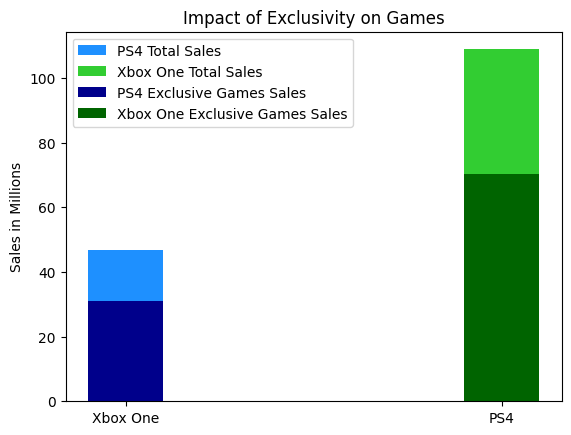

In [197]:
c_sales = pd.read_csv('../Datasets/console.csv')

xb_tot_sales = c_sales[c_sales['ConsoleID'] == 'XOne']['Sales'].iloc[0]
ps_tot_sales= c_sales[c_sales['ConsoleID'] == 'PS4']['Sales'].iloc[0]

xbone_sales = xb_df_sp['Global'].sum()
ps4_sales = ps_df_sp['Global'].sum()

vals_to_plot1 = [xb_tot_sales, ps_tot_sales]
vals_to_plot2 = [xbone_sales, ps4_sales]
labels = ['Xbox One', 'PS4']


plt.title("Impact of Exclusivity on Games")
plt.bar(labels, vals_to_plot1, width=0.2, label=["PS4 Total Sales", "Xbox One Total Sales"], color=['dodgerblue', 'limegreen'])
plt.bar(labels, vals_to_plot2, width=0.2, label=["PS4 Exclusive Games Sales", "Xbox One Exclusive Games Sales"], color=['darkblue', 'darkgreen'])
plt.ylabel("Sales in Millions")
plt.legend()
plt.show()